Tarea 6

Fernando Maximiliano López Villegas

In [1051]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Filtro pasa bajos
# a)

In [1052]:
# Primero definamos el pulso
def V_int(t):
    if np.floor(2*t) % 2 == 0:
        return 1
    else:
        return -1
#Le coco melon
def f(V,t,RC):
    return (V_int(t)-V)/ RC

In [1053]:
a = 0.0
b = 10.0
N = 1000
x0 = 0.0

In [1054]:
def EulerCTE(f,a,b,N,x0,RC):
    h = (b-a)/N
    x = x0
    tpoints = np.arange(a,b,h)
    xpoints = []
    for t in tpoints:
        xpoints.append(x)
        x += h*f(x,t,RC)
    return xpoints, tpoints

In [1055]:
def RK4CTE(f,a,b,N,x0,RC):
    h = (b-a)/N 
    tpoints = np.arange(a,b,h) 
    xpoints = [] 
    x = x0 
    for t in tpoints:
        xpoints.append(x)
        k1 = h * f(x,t,RC)
        k2 = h * f(x + 0.5*k1, t+0.5*h,RC)
        k3 = h * f(x + 0.5*k2, t+0.5*h,RC)
        k4 = h * f(x+k3, t + h,RC)
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, tpoints 

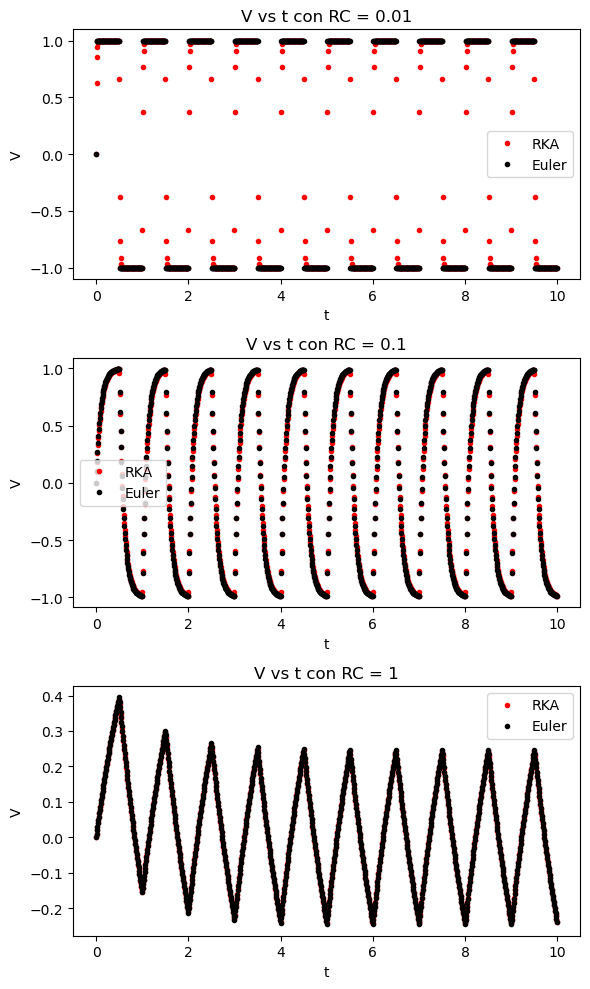

In [1056]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
RCs = [0.01, 0.1, 1] 

for i in range(3):
    xpoints, tpoints = RK4CTE(f,a,b,N,x0,RCs[i])
    xpoints2,tpoints2 = EulerCTE(f,a,b,N,x0,RCs[i])

    axs[i].plot(tpoints, xpoints, '.',label = "RKA", color='r')
    axs[i].plot(tpoints2,xpoints2,'.', label = "Euler",color = 'k')
    axs[i].set_title(f"V vs t con RC = {RCs[i]}")
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("V")
    axs[i].legend()
plt.tight_layout() 

# b)
Bueno, no ponemos lineas continuas para apreciar mejor el comportamiento de cada uno de los métodos para la misma ecuación, pero en si, nos manda ciertos tiempos a cierto voltaje, y eso se nota mucho en RC = 0.01, para RC = 0.1 no es tán obvio, el voltaje se ve suave, pero cuando es RC = 1 la cosa cambia drasticamente y vemos que es muy puntiaguda, otra cosa que hay que notar es que el codominio del voltaje se ve reducido, y a pesar de que no es brusco el comportamiento del circuito, sigue queriendo hacer lo mismo que se nota en el primero.


# c)
Euler es más preciso que Runge-Kutta de orden 4, y eso se nota en RC = 0.01 donde RK4 deja muhcos puntos entre las cotas inferiores y superiores, Euler lo hace perfecto (más preciso pues).

# 2. El modelo de Lotka-Volterra (depredador-presa)
# a)

In [1057]:
def f(r,t,a,b,c,d):
    x = r[0]
    y = r[1]
    fx = a*x - b*x*y
    fy = c*x*y - d*y
    return np.array([fx,fy],float)

In [1058]:
a = 1.0
b = 0.5
c = 0.5
d = 2.0
r = np.array([2.0,2.0],float)
t0 = 0.0
tf = 30.0
N = 1000

In [1059]:
def EulerCTE2(f,r,a,b,c,d,t0,tf,N):
    h = (tf-t0)/N
    tpoints, xpoints, ypoints = np.arange(t0,tf,h),[], []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        r += h * f(r,t,a,b,c,d)
    return xpoints, ypoints, tpoints

In [1060]:
def RK4CTE2(f,r,a,b,c,d,t0,tf,N):
    h = (tf-t0)/N
    tpoints,xpoints,ypoints = np.arange(t0,tf,h), [], []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h * f(r,t,a,b,c,d)
        k2 = h * f(r + 0.5*k1, t+0.5*h,a,b,c,d)
        k3 = h * f(r + 0.5*k2, t+0.5*h,a,b,c,d)
        k4 = h * f(r+k3, t + h,a,b,c,d)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, ypoints, tpoints

In [1061]:
# Voy a tratar de no mezclar nombres, pero es inevitable que luego compile feo.
#2 Euler
xpoints22, ypoints22,tpoints22 = EulerCTE2(f,r,a,b,c,d,t0,tf,N)
# 2 RK4
xpoints222,ypoints222,tpoints222 = RK4CTE2(f,r,a,b,c,d,t0,tf,N)

# b)

 1)

In [1062]:
lowerx, upperx = 0, 13
lowery,uppery = 0,9
points = 10
def fmod(r, t):
    a = 1.0
    b = 0.5
    c = 0.5
    d = 2.0
    x, y = r
    fx = a*x - b*x*y
    fy = c*x*y - d*y
    return np.array([fx, fy], float)
x = np.linspace(lowerx, upperx, points)
y = np.linspace(lowery, uppery, points)
X, Y = np.meshgrid(x, y)
U, V = fmod([X, Y], 0)
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

C:\Users\think\AppData\Local\Temp\ipykernel_13004\292261335.py:18: RuntimeWarning: invalid value encountered in divide
  U /= N
C:\Users\think\AppData\Local\Temp\ipykernel_13004\292261335.py:19: RuntimeWarning: invalid value encountered in divide
  V /= N


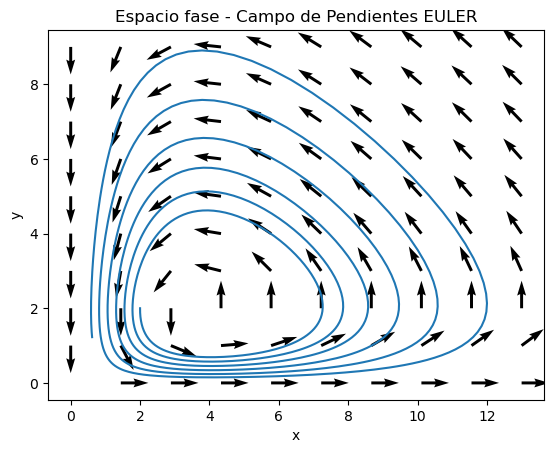

In [1063]:
plt.quiver(X, Y, U, V, angles='xy')
plt.plot(xpoints22,ypoints22)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Espacio fase - Campo de Pendientes EULER")
plt.show()

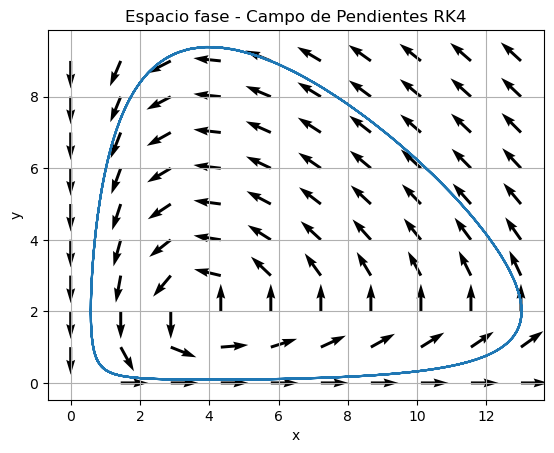

In [1064]:
# Plot the slope field
plt.quiver(X, Y, U, V, angles='xy')
plt.plot(xpoints222,ypoints222)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Espacio fase - Campo de Pendientes RK4")
plt.grid(True)
plt.show()

2)

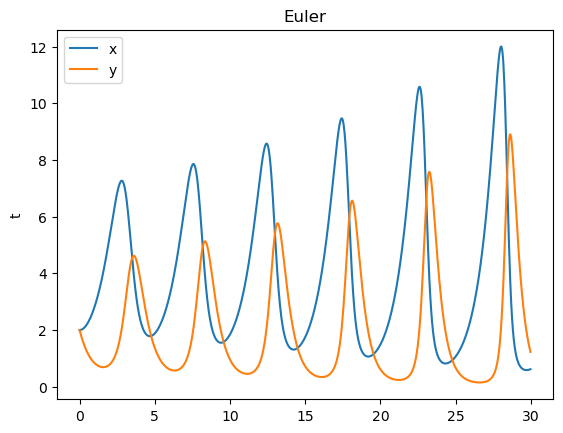

In [1065]:
plt.plot(tpoints22,xpoints22,label = "x")
plt.plot(tpoints22,ypoints22,label = "y")
plt.legend()
plt.ylabel("t")
plt.title("Euler")
plt.show()

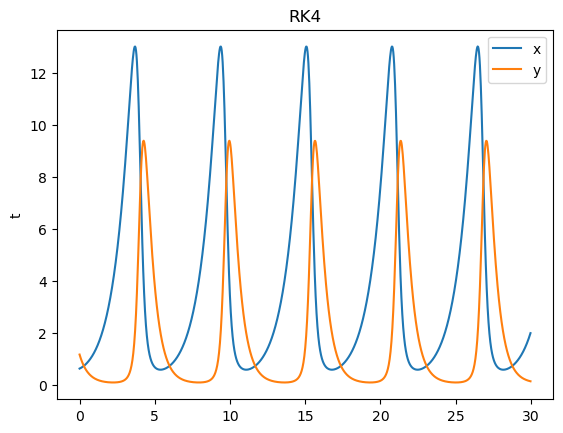

In [1066]:
plt.plot(tpoints222,xpoints222,label = "x")
plt.plot(tpoints222,ypoints222,label = "y")
plt.legend()
plt.ylabel("t")
plt.title("RK4")
plt.show()

## c)

Pues obvio, una vez que uno de ellos alcanza un minimo (en algunos puntos), el otro está en su apogeo, y viceversa, se tratan de no extinguir entre ellos.

## d) 

Pues en este caso, se nota que RK4 es más estable, Euler tiene una evolución pero no sé exactamente donde me equivoqué al implementar este algoritmo (por una parte me inclinó por Euler, pero RK4 está bien implementado).

# 3) Las Ecuaciones de Lorenz

In [1067]:
#Nos dice que usemos uno o el otro, pero uso RK4.

## a)

In [1068]:
sigma = 10.0
erre = 28.0
beta = 8.0/3
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = erre*x - y - x*z
    fz = x*y - beta*z
    return np.array([fx,fy,fz],float)

t0 = 0.0
tf = 50.0
N = 10000
r = np.array([0.0,1.0,0.0],float)

In [1069]:
def RK4_2(f,r,t0,tf,N):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    xpoints = []
    ypoints = []
    zpoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = h * f(r,t)
        k2 = h * f(r + 0.5*k1, t+0.5*h)
        k3 = h * f(r + 0.5*k2, t+0.5*h)
        k4 = h * f(r+k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return xpoints, ypoints, zpoints, tpoints

## b)

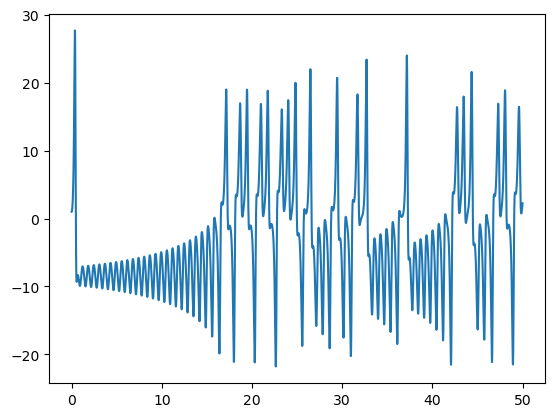

In [1070]:
xpoints3, ypoints3, zpoints3, tpoints3 = RK4_2(f,r,t0,tf,N)
plt.plot(tpoints3,ypoints3)
plt.show()

## c)

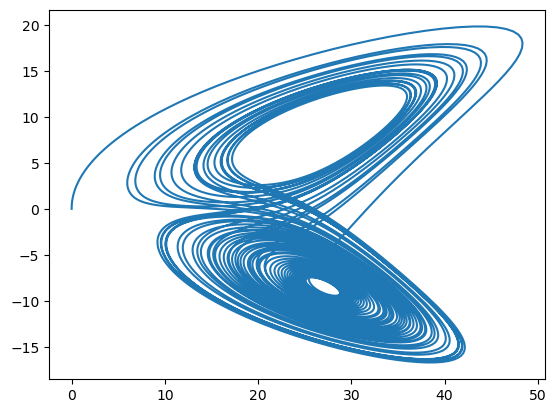

In [1071]:
plt.plot(zpoints3,xpoints3)
plt.show()

# 4) El péndulo simple

## a)

In [1072]:
g = 9.81
l =0.1

def f(r,t):
    theta, omega = r
    ftheta = omega
    fomega = -g/l*np.sin(theta)
    return np.array([ftheta,fomega],float)

t0 = 0.0
tf = 10.0
Np = 3000
thetha = [0,np.pi/2,np.pi,3*np.pi/2,np.pi*2]
r = np.array([thetha[1],0],float)

In [1073]:
def WachinangoRK4(f,r,t0,tf,N):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    thetapoints = []
    omegapoints = []
    for t in tpoints:
        thetapoints.append(r[0])
        omegapoints.append(r[1])
        k1 = h * f(r,t)
        k2 = h * f(r + 0.5*k1, t+0.5*h)
        k3 = h * f(r + 0.5*k2, t+0.5*h)
        k4 = h * f(r+k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return thetapoints,tpoints,omegapoints

## b)

In [1074]:
lowerx, upperx = -3, 13
lowery,uppery = -20,15
points = 25
def fmod(r,t):
    theta, omega = r
    ftheta = omega
    fomega = -g/l*np.sin(theta)
    return np.array([ftheta,fomega],float)
x = np.linspace(lowerx, upperx, points)
y = np.linspace(lowery, uppery, points)
X, Y = np.meshgrid(x, y)
U, V = fmod([X, Y], 0)
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

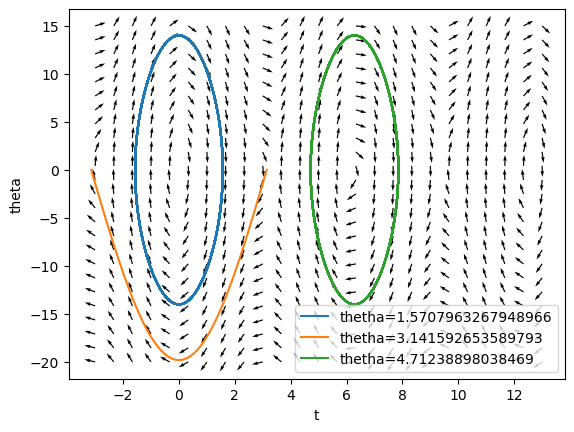

In [1075]:
thetha = [np.pi/2, np.pi, 3*np.pi/2]
for i in range(len(thetha)):
    r = np.array([thetha[i], 0], float)
    thetapoints4, tpoints4,omegapoints4 = WachinangoRK4(f, r, t0, tf, Np)
    plt.plot(thetapoints4,omegapoints4, label=f'thetha={thetha[i]}')
plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel("t")
plt.ylabel("theta")
plt.legend()
plt.show()


## c)

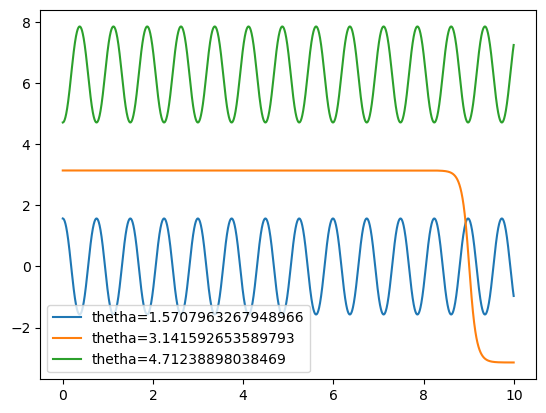

In [1076]:
thetha = [np.pi/2, np.pi, 3*np.pi/2]
for i in range(len(thetha)):
    r = np.array([thetha[i], 0], float)
    thetapoints4, tpoints4,omegapoints4 = WachinangoRK4(f, r, t0, tf, Np)
    plt.plot(tpoints4,thetapoints4, label=f'thetha={thetha[i]}')
plt.legend()

## d)

Ta oscilando

# 5. El péndulo doble


## a)
Tenemos que $E = T + V$ donde $T =\frac{1}{2}m(v_1^2+v_2^2)$ y $V = mgh_1+mgh_2$, entonces:
$$E = \left(\frac{1}{2}ml^2(2\dot{\theta_1^2}+\dot{\theta_2^2}+2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2))\right) + (-mgl(2\cos\theta_1+\cos\theta_2))$$



## b)

In [1077]:
def RK4_2_AWITADO(f,r,t0,tf,N,g,l):
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    theta1points,theta2points,omega1points,omega2points = [],[],[],[]
    for t in tpoints:
        theta1points.append(r[0])
        theta2points.append(r[1])
        omega1points.append(r[2])
        omega2points.append(r[3])
        k1 = h * f(r,t,g,l,)
        k2 = h * f(r + 0.5*k1, t+0.5*h,g,l)
        k3 = h * f(r + 0.5*k2, t+0.5*h,g,l)
        k4 = h * f(r+k3, t + h,g,l)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return theta1points,theta2points,omega1points,omega2points,tpoints

In [1078]:
g = 9.81 
l = 0.4 
r = np.array([np.pi/2, np.pi/2, 0.0, 0.0],float)
t0 = 0
tf = 100
N = 10000

In [1079]:
def f(r,t,g,l):
    theta_1, theta_2, omega_1, omega_2 = r
    ftheta1 = omega_1
    ftheta2 = omega_2
    fomega1 =  -((omega_1**2)*np.sin(2*theta_1 - 2*theta_2)+2*(omega_2**2)*np.sin(theta_1 - theta_2)+(g/l)*(np.sin(theta_1 - 2*theta_2) + 3*np.sin(theta_1)))/(3 - np.cos(2*theta_1 - 2*theta_2))
    fomega2 = (4*(omega_1**2)*np.sin(theta_1 - theta_2)+(omega_2**2)*np.sin(2*theta_1 - 2*theta_2)+2*(g/l)*(np.sin(2*theta_1 - theta_2) - np.sin(theta_2)))/(3 - np.cos(2*theta_1 - 2*theta_2))
    return np.array([ftheta1,ftheta2,fomega1,fomega2],float)

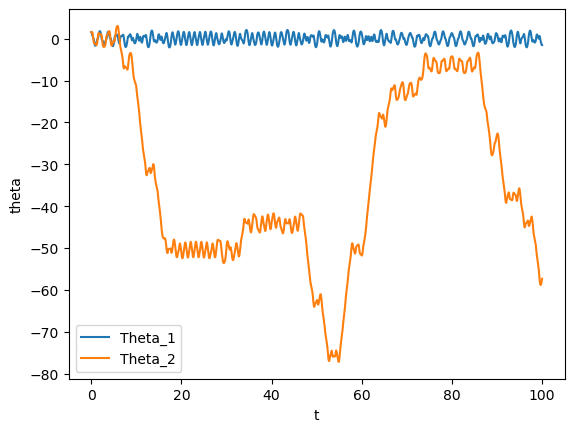

In [1080]:
theta1points,theta2points,omega1points,omega2points, tpoints = RK4_2_AWITADO(f,r, t0, tf, N,g,l)
plt.plot(tpoints, theta1points, label='Theta_1')
plt.plot(tpoints, theta2points, label='Theta_2')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

In [1081]:
def Et(m, g, l, theta1, theta2,omega1, omega2):
  return 0.5*m*(l**2) * (2*(omega1**2) + omega2**2 + 2*omega1*omega2*np.cos(theta1-theta2))- m*g*l*(2*np.cos(theta1) + np.cos(theta2))

In [1082]:
m = 1

In [1083]:
Ett = []
for i in range(0, 100):
  wasabi = Et(m,g,l,theta1points[i],theta2points[i],omega1points[i],omega2points[i])
  Ett.append(wasabi)

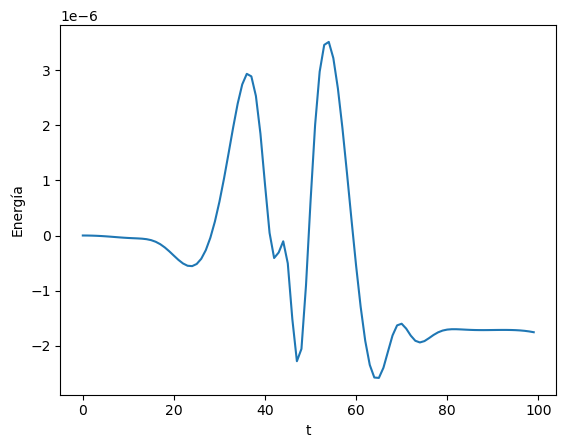

In [1084]:
plt.plot(Ett)
plt.xlabel('t')
plt.ylabel('Energía')
plt.show()